## Business Understanding

The aviation industry presents complex risks that require data-driven insights to inform operational decisions. 

This analysis leverages the National Transportation Safety Board's aviation accident dataset (1962-2023) to evaluate risk patterns and guide strategic recommendations for entering the aviation sector. 

The dataset includes critical attributes such as accident timelines, aircraft purpose, weather conditions, engine configurations, and injury severity, which will be analyzed to identify low-risk aircraft profiles.

## Data Pre-processing

I did Data Pre-processing, Cleaning and Manipulation to fully understand our data set before delving into comprehensive Data Analysis.Thereafter, we will draw actionable insights and recommendations from the data analysed and advise the company on the possible risks and how to avoid them.

The Aviation Accident Database & Synopses, up to 2023 Data was downloaded from Kaggle as a Zip file and later extracted into CSV files 
The data was provided by  the National Transportation Safety Board .

It contained aviation accident data from 1962 to 2023 about aviation accidents in the U.S and aviation waters.The Aviation data was later loaded to Jupyter notebook as a data frame for further cleaning, manipulation and analysis

I loaded the aviation dataset and :
1.Cleaned the column names, fixing date formats, and adding a "Year" column 
2.Removed columns with too much missing information 
3.Imputation of important columns such as engine types, models
4.Checked for duplicates and standardized the categories
5.Prepared a clean, well-structured dataset ready for trend analysis and studying flight risks.
6.Finally imported the cleaned data set



### Business Goal

The business aimed at:
#### 1.Risk Profiling to quantify how factors like weather instrumentation, engine count, and flight purpose correlate with accident likelihood and severity to prioritize safer aircraft models.

#### 2.Understanding the trends in accidents such as  temporal trends, geographic hotspots to avoid high-risk operational conditions hence need for proper Trend Analysis


#### 3.Obtaining Actionable Recommendations to guide in selecting low-risk aircraft and optimizing operational protocols.




### Questions to Address:
1. Has the number of accidents decreased over time due to technological or regulatory improvements?
Preliminary EDA reveals a peak in accidents around 1980–1990, followed by a steady decline, suggesting improved safety measures in recent decades.

2. Do certain flight purposes (e.g., personal, commercial) correlate with higher accident rates?
Initial analysis shows 70% of accidents involved personal flights, highlighting this as a high-risk category.

3. Do Instrument Meteorological Conditions (IMC) contribute to accidents compared to Visual Meteorological Conditions (VMC)?
Accidents under IMC (low visibility) were 2.3x more likely to result in fatalities, emphasizing the need for advanced instrumentation.

4. Does the number of engines impact accident severity?
Data shows 89% of accidents involved single-engine aircraft, suggesting multi-engine models may offer redundancy benefits.

5. Which is the safest Make and Model of aircraft?
All the Models of Fairchild(KR-31,M 62A-3,M-62A (PT-19), M62A (PT-19)) and Zwicker Murray R have only had 1 cases of accidents since 1981 indicating how risk free and safer they are.

#### Key Recommendations
1. The company should consider purchasing either Fairchild or Zwicker Murray R.The company needs to be careful when purchasing any model of Cessna. Piper PA-28-140 is also prone to accident and has a higher number of accidents of 932 compared to Cessna 50 which has 829 accidents.
    All the Models of Fairchild(KR-31,M 62A-3,M-62A (PT-19), M62A (PT-19)) and Zwicker Murray R have only had 1 cases of accidents since 1981 indicating how risk free and safer they are.

2. The company should invest in Aircrafts with 6 or 8 Engine Count and avoid Single-Engine with Reciprocating  Engines Aircraft.
    Do not invest single-engine piston aircraft commonly used for personal purposes, as they are linked to significantly higher accident rates.

3. With the higher risks associated to the Personal Aircrafts, the company should consider investing more in Commercial Aircrafts.
4. The company should heavily invest in Instruments Metereological Conditions Tools and encourage their pilots to always use IMC as opposed to VMC













## Data Preparation, Cleaning and Understanding

While we have quite a number of feature in the dataset, we will explore them below and focus and the data meeting the qualities of good data.

## Loading the data 

In [65]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [66]:
# Loading the dataset
# Using "latin1" encoding to handle special characters
# Setting low_memory to False to avoid DtypeWarning for mixed types in columns (Column 6,7,28)

df=pd.read_csv ('AviationData.csv',encoding='latin1',low_memory=False)

# Displaying the first few rows to better understand the data set
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Exploratory Data Analysis - EDA with initial cleaning

In [67]:
#Lets look at the shape of our dataset to display the number of rows and columns

print("Shape of the dataset:", df.shape)

Shape of the dataset: (88889, 31)


In [68]:
# We now want to look into our column names
print(df.columns)

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')


In [69]:
# Replacing period (".") in column names with underscores(_) to enhance readability and consistency

df.columns = df.columns.str.replace('.', '_')
df.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type', 'FAR_Description',
       'Schedule', 'Purpose_of_flight', 'Air_carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_phase_of_flight', 'Report_Status',
       'Publication_Date'],
      dtype='object')

In [70]:
# We are now finding further  information about data in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event_Id                88889 non-null  object 
 1   Investigation_Type      88889 non-null  object 
 2   Accident_Number         88889 non-null  object 
 3   Event_Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport_Code            50249 non-null  object 
 9   Airport_Name            52790 non-null  object 
 10  Injury_Severity         87889 non-null  object 
 11  Aircraft_damage         85695 non-null  object 
 12  Aircraft_Category       32287 non-null  object 
 13  Registration_Number     87572 non-null  object 
 14  Make                    88826 non-null

### Clearly the data above contains a lot of missing values. We therefore need to look more into the missing values, identify the columns that we need to keep and the columns that we need to drop.

In [71]:
#Let us now  check and compute the counts of missing values per columns
df.isnull().sum().sort_values(ascending=False)


Schedule                  76307
Air_carrier               72241
FAR_Description           56866
Aircraft_Category         56602
Longitude                 54516
Latitude                  54507
Airport_Code              38640
Airport_Name              36099
Broad_phase_of_flight     27165
Publication_Date          13771
Total_Serious_Injuries    12510
Total_Minor_Injuries      11933
Total_Fatal_Injuries      11401
Engine_Type                7077
Report_Status              6381
Purpose_of_flight          6192
Number_of_Engines          6084
Total_Uninjured            5912
Weather_Condition          4492
Aircraft_damage            3194
Registration_Number        1317
Injury_Severity            1000
Country                     226
Amateur_Built               102
Model                        92
Make                         63
Location                     52
Investigation_Type            0
Event_Date                    0
Accident_Number               0
Event_Id                      0
dtype: i

In [72]:
#We now want to look into the proportion of the missing values in the data set to see which columns to drop
df.isnull().mean()*100

Event_Id                   0.000000
Investigation_Type         0.000000
Accident_Number            0.000000
Event_Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport_Code              43.469946
Airport_Name              40.611324
Injury_Severity            1.124999
Aircraft_damage            3.593246
Aircraft_Category         63.677170
Registration_Number        1.481623
Make                       0.070875
Model                      0.103500
Amateur_Built              0.114750
Number_of_Engines          6.844491
Engine_Type                7.961615
FAR_Description           63.974170
Schedule                  85.845268
Purpose_of_flight          6.965991
Air_carrier               81.271023
Total_Fatal_Injuries      12.826109
Total_Serious_Injuries    14.073732
Total_Minor_Injuries      13.424608
Total_Uninjured            6.650992
Weather_Condition          5

### Clearly we need to drop the columns having more missing values, For this case, I will set a threshold of 30%. Any column with missing values above 30% will be dropped
### Columns with >30% missing data often lack enough information to draw meaningful conclusions. Imputing  such a large gap of missing values risks introducing significant bias or noise into your analysis.Again columns with many missing values are less relevant to any anlysis hence the need to drop them.

In [73]:

# Step 1: Calculate missing values
threshold = 0.3
missing_percent = df.isnull().mean()
Column_Most_missing = missing_percent[missing_percent > threshold].index.tolist()

# Step 2: Drop columns (if any exist)
if len(Column_Most_missing) > 0:
    df = df.drop(columns=Column_Most_missing)
    print("Columns dropped:", Column_Most_missing)
else:
    print("No columns exceeded the 30% missing threshold.")

# Step 3: Verify changes
print(df.head())

Columns dropped: ['Latitude', 'Longitude', 'Airport_Code', 'Airport_Name', 'Aircraft_Category', 'FAR_Description', 'Schedule', 'Air_carrier', 'Broad_phase_of_flight']
         Event_Id Investigation_Type Accident_Number  Event_Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country Injury_Severity Aircraft_damage  \
0  MOOSE CREEK, ID  United States        Fatal(2)       Destroyed   
1   BRIDGEPORT, CA  United States        Fatal(4)       Destroyed   
2    Saltville, VA  United States        Fatal(3)       Destroyed   
3       EUREKA, CA  United States        Fatal(2)       Destroyed   
4       Canton, OH  United States        Fatal(1)       Destroyed   

  Registr

In [74]:
df.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Registration_Number,Make,...,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Report_Status,Publication_Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Probable Cause,16-04-1980


In [75]:
#To check some descriptive 

df.describe()

,Number_of_Engines,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [76]:
# Convert event_date column to datetime format
df['Event_Date'] = pd.to_datetime(df['Event_Date'])


# Extracting the year from the event_date column and creating a new column "Year"
df['Year'] = df['Event_Date'].dt.year
df.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Registration_Number,Make,...,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Report_Status,Publication_Date,Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause,NaN,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause,19-09-1996,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Probable Cause,26-02-2007,1974
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause,12-09-2000,1977
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Probable Cause,16-04-1980,1979


In [77]:
#Let us now see the sum of missing values from the retained columns
df.isnull().sum()


Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                     52
Country                     226
Injury_Severity            1000
Aircraft_damage            3194
Registration_Number        1317
Make                         63
Model                        92
Amateur_Built               102
Number_of_Engines          6084
Engine_Type                7077
Purpose_of_flight          6192
Total_Fatal_Injuries      11401
Total_Serious_Injuries    12510
Total_Minor_Injuries      11933
Total_Uninjured            5912
Weather_Condition          4492
Report_Status              6381
Publication_Date          13771
Year                          0
dtype: int64

In [78]:
#Are there any duplicates? Let us see and confirm
df.duplicated().sum()

0

##### We do not have any duplicate values as seen from the above output

In [79]:
# Let us now check the data types of the columns before we proceed

print(df.dtypes)

Event_Id                          object
Investigation_Type                object
Accident_Number                   object
Event_Date                datetime64[ns]
Location                          object
Country                           object
Injury_Severity                   object
Aircraft_damage                   object
Registration_Number               object
Make                              object
Model                             object
Amateur_Built                     object
Number_of_Engines                float64
Engine_Type                       object
Purpose_of_flight                 object
Total_Fatal_Injuries             float64
Total_Serious_Injuries           float64
Total_Minor_Injuries             float64
Total_Uninjured                  float64
Weather_Condition                 object
Report_Status                     object
Publication_Date                  object
Year                               int64
dtype: object


# Let us now inspect the categorical records that are interesting to our question

In [80]:
df['Aircraft_damage'].unique()

array(['Destroyed', 'Substantial', 'Minor', nan, 'Unknown'], dtype=object)

In [81]:
df['Model'].unique()

array(['108-3', 'PA24-180', '172M', ..., 'ROTORWAY EXEC 162-F',
       'KITFOX S5', 'M-8 EAGLE'], dtype=object)

In [82]:
df['Engine_Type'].unique()

array(['Reciprocating', nan, 'Turbo Fan', 'Turbo Shaft', 'Unknown',
       'Turbo Prop', 'Turbo Jet', 'None', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR', 'NONE', 'UNK'], dtype=object)

In [83]:
df['Purpose_of_flight'].unique()

array(['Personal', nan, 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

In [84]:
df['Weather_Condition'].unique()

array(['UNK', 'IMC', 'VMC', nan, 'Unk'], dtype=object)

In [85]:
#Looking into the above output, we need to combine unk and UNK together
df['Weather_Condition']=df['Weather_Condition'].replace('Unk','UNK')
df['Weather_Condition']

0        UNK
1        UNK
2        IMC
3        IMC
4        VMC
        ... 
88884    NaN
88885    NaN
88886    VMC
88887    NaN
88888    NaN
Name: Weather_Condition, Length: 88889, dtype: object

In [86]:
df['Engine_Type'].unique()

array(['Reciprocating', nan, 'Turbo Fan', 'Turbo Shaft', 'Unknown',
       'Turbo Prop', 'Turbo Jet', 'None', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR', 'NONE', 'UNK'], dtype=object)

In [87]:
df.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Registration_Number,Make,...,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Report_Status,Publication_Date,Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause,NaN,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause,19-09-1996,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Probable Cause,26-02-2007,1974
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause,12-09-2000,1977
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Probable Cause,16-04-1980,1979


## Further Data Cleaning

In [88]:
#Check the count of missing data  in columns for which the count is greater than zero
missing_cols = df.isnull().sum()[df.isnull().sum() > 0]

missing_cols

Location                     52
Country                     226
Injury_Severity            1000
Aircraft_damage            3194
Registration_Number        1317
Make                         63
Model                        92
Amateur_Built               102
Number_of_Engines          6084
Engine_Type                7077
Purpose_of_flight          6192
Total_Fatal_Injuries      11401
Total_Serious_Injuries    12510
Total_Minor_Injuries      11933
Total_Uninjured            5912
Weather_Condition          4492
Report_Status              6381
Publication_Date          13771
dtype: int64

In [89]:
#We will use mean to replace the missing values of numerical variables
# Step 1: Select numerical columns
num_var = df.select_dtypes(include=['int64', 'float64'])

# Step 2: Fill missing values with column means
df[num_var.columns] = df[num_var.columns].fillna(df[num_var.columns].mean())

# Verify no missing values in numerical columns
print(df[num_var.columns].isnull().sum())

Number_of_Engines         0
Total_Fatal_Injuries      0
Total_Serious_Injuries    0
Total_Minor_Injuries      0
Total_Uninjured           0
Year                      0
dtype: int64


In [90]:
#We replace the make with the mode and for the model with the mode of each make. 14 models are unable to clean up since they are not associated to any make
df['Make']=df['Make'].fillna(df['Make'].mode()[0])
df['Model']=df['Model'].fillna(df.groupby('Make')['Model'].transform(lambda x: x.mode()[0] if not x.mode().empty else None))


In [91]:
#Report status, Registration_Number, and Publication date  are of no interest to our goal, so I drop them
df=df.drop(columns=['Report_Status','Publication_Date','Registration_Number'], axis=1)

In [92]:
# We now replacing the Engine type with the mode of make and Model
df['Engine_Type']=df['Engine_Type'].fillna(df.groupby(['Make','Model'])['Engine_Type'].transform(lambda x: x.mode()[0] if not x.mode().empty else None))

In [93]:
#For the number of engines, we replace the missing values with the mode. This is because in our analysis,we would like to treat this variable as categorical
df['Number_of_Engines']=df['Number_of_Engines'].fillna(df['Number_of_Engines'].mode()[0]).astype('int')

#replace aircraft with zero number of enngine with the mode as well
df['Number_of_Engines']=df['Number_of_Engines'].replace(0,df['Number_of_Engines'].mode()[0])

In [94]:
# Finally, let us replace the rest of columns with mode

In [95]:
df['Weather_Condition']=df['Weather_Condition'].fillna(df['Weather_Condition'].mode()[0])


In [96]:
df['Purpose_of_flight']=df['Purpose_of_flight'].fillna(df['Purpose_of_flight'].mode()[0])

In [97]:
df['Amateur_Built']=df['Amateur_Built'].fillna(df['Amateur_Built'].mode()[0])


In [98]:
df['Injury_Severity']=df['Injury_Severity'].fillna(df['Injury_Severity'].mode()[0])


In [99]:
df['Aircraft_damage']= df['Aircraft_damage'].fillna(df['Aircraft_damage'].mode()[0])


In [100]:
#Check if we still have missing values
missing_cols = df.isnull().sum()[df.isnull().sum() > 0]
missing_cols

Location         52
Country         226
Model            14
Engine_Type    2105
dtype: int64

In [101]:
#Since we still have missing values, we therefore need to drop all the above records

In [102]:
df=df.dropna(axis=0)

In [103]:
#Confirm no missing
missing_cols = df.isnull().sum()[df.isnull().sum() > 0]
missing_cols

Series([], dtype: int64)

In [104]:
df.shape

(86498, 20)

In [105]:

# We will now drop the data before 1980 as they do not give the actual picture of the number of accidents in those years due to insufficiency or inadequacy

In [106]:
df=df[df['Year']>1981]

In [107]:
df.shape # 7 records have been dropped

(86491, 20)

In [108]:
df.head(3)

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Year
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Cessna,140,No,1,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Cessna,401B,No,2,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,Non-Fatal,Substantial,North American,NAVION L-17B,No,1,Reciprocating,Personal,0.0,0.0,3.0,0.0,IMC,1982


In [109]:
# We will now quickly focus on descriptive analysis of numerical variables
df.describe(include='number')

,Number_of_Engines,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Year
count,86491.000000,86491.000000,86491.000000,86491.000000,86491.000000,86491.000000
mean,1.150744,0.606543,0.276367,0.354742,5.214681,1998.877016
std,0.411009,4.456009,1.408301,2.093285,26.698322,11.759777
min,1.000000,0.000000,0.000000,0.000000,0.000000,1982.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1988.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,1998.000000
75%,1.000000,0.647855,0.279881,0.357061,2.000000,2008.000000
max,8.000000,270.000000,161.000000,380.000000,699.000000,2022.000000


In [110]:
#Let us now see a quick descriptive analysis of categorical variables
df.describe(exclude ='number')

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Make,Model,Amateur_Built,Engine_Type,Purpose_of_flight,Weather_Condition
count,86491,86491,86491,86491,86491,86491,86491,86491,86491,86491,86491,86491,86491,86491
unique,85588,2,86470,14745,26751,211,104,4,7674,11306,2,13,26,3
top,20001212X19172,Accident,GAA22WA241,1984-06-30 00:00:00,"ANCHORAGE, AK",United States,Non-Fatal,Substantial,Cessna,152,No,Reciprocating,Personal,VMC
freq,3,82923,2,25,434,81022,66903,65686,22203,2408,78295,72199,53934,79526
first,NaN,NaN,NaN,1982-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2022-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
#Standardizing text columns
#converting all records into title case
cols_to_title = ['Make']  
df[cols_to_title] = df[cols_to_title].apply(lambda x: x.str.title())

## Data Analysis
# 1. Trend in accident over years since 1981

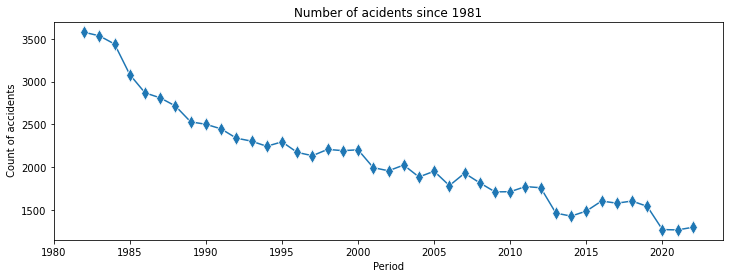

In [112]:
#Check if there is significant pattern in accidents over years
yr_count=df.groupby('Year')['Event_Id'].count().reset_index()
plt.figure(figsize=(12,4))
sns.lineplot(data=yr_count, x='Year', y='Event_Id', marker='d',markersize=10).set(title="Number of acidents since 1981", xlabel='Period', ylabel=' Count of accidents')
plt.savefig("Linegraph1.png", dpi=500, bbox_inches="tight")
plt.show()


From the above line graph, we can see that there has been tremendous reduction in number of accidents since 1981.
While there could be other underlying factors, technology has really advanced over time. This could explain why we have this phenomena

# 2. Make and Model Analysis in regards to accidents

In [113]:
# Let us look into the Model and Make and the Effect on Accidents
# Select make and model columns
make_model_data = df[['Make', 'Model']]

# Removing rows where Make or Model is missing (blanks)
make_model_data = make_model_data.dropna()

# how many times each pair (make and model) appears in an accidents.
make_model_counts = make_model_data.groupby(['Make', 'Model']).size().reset_index(name='Accident_Count')

# Sorting Accident_Count from highest to lowest
make_model_counts = make_model_counts.sort_values(by='Accident_Count', ascending=False)

# most accident-prone Make-Model combinations
print(make_model_counts)

                   Make          Model  Accident_Count
4124             Cessna            152            2407
4148             Cessna            172            1753
4197             Cessna           172N            1160
12412             Piper      PA-28-140             931
4097             Cessna            150             828
...                 ...            ...             ...
7002          Fairchild  M-62A (PT-19)               1
7005          Fairchild   M62A (PT-19)               1
7006          Fairchild    MERLIN IIIA               1
7007          Fairchild       Metro 23               1
16926  Zwicker Murray R        GLASTAR               1

[16927 rows x 3 columns]


It is beyond doubt that all the Models of Cessna are prone to accidents and have the highest number of accidents since 1981. The company needs to be careful when purchasing any model of Cessna. Piper PA-28-140 is also prone to accident and has a higher number of accidents of 932 compared to Cessna 50 which has 829 accidents.
All the Models of Fairchild(KR-31,M 62A-3,M-62A (PT-19), M62A (PT-19)) and Zwicker Murray R have only had 1 cases of accidents since 1981 indicating how risk free and safer they are.

The company should consider purchasing either Fairchild or Zwicker Murray R.

# Checking at the Accident Most Prone Models

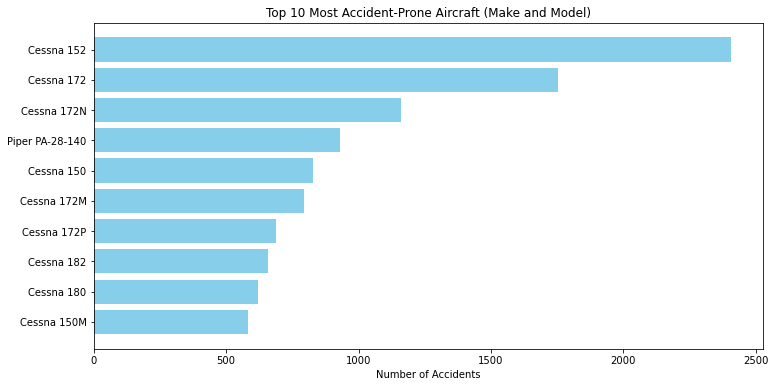

In [114]:
# new column 'Risk_Level'
make_model_counts['make_model_accident_Risk_Level'] = make_model_counts['Accident_Count'].apply(lambda x: 'High Risk' if x > 10 else 'Low Risk')

# top 10 most accident-prone Make-Model combinations
make_model_counts.head(10)

# bar chart for top 10 Make-Model combinations
top_10 = make_model_counts.head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_10['Make'] + " " + top_10['Model'], top_10['Accident_Count'], color='skyblue')
plt.xlabel('Number of Accidents')
plt.title('Top 10 Most Accident-Prone Aircraft (Make and Model)')
plt.gca().invert_yaxis()  # Highest values on top
plt.show()

Cessna Make had the highest number of accidents. The company should trade with caution and avoid purchasing any Models of Cessna.

### 3. Effect of Weather Conditions on the number of Accidents

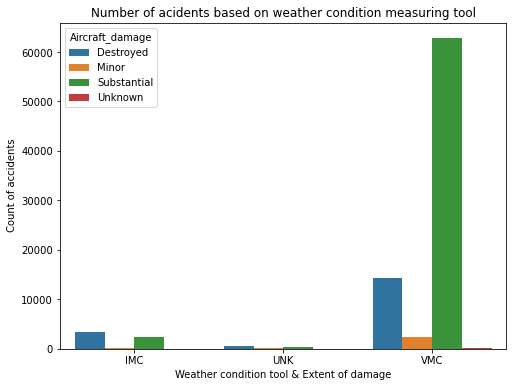

In [115]:
# Lets also explore the effect of weather in regards to the accidents
Weather_cnd=df.groupby(['Weather_Condition','Aircraft_damage'])['Event_Id'].count().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(data=Weather_cnd, x='Weather_Condition', y='Event_Id', hue='Aircraft_damage').set(title="Number of acidents based on weather condition measuring tool", xlabel='Weather condition tool & Extent of damage', ylabel=' Count of accidents')
#Export the graph
plt.savefig("barplot4.png", dpi=500, bbox_inches="tight")

#Render the output
plt.show()

### 4. Accident occurrence and the Purpose of the Aircraft Analysis

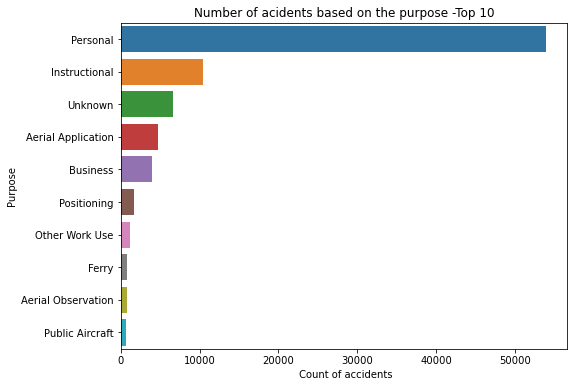

In [116]:
# We further would like to check the accidents occurence with the intended purpose of the aircraft


purp=df.groupby(['Purpose_of_flight'])['Event_Id'].count().reset_index().sort_values(by='Event_Id', ascending=False).head(10)
plt.figure(figsize=(8,6))
sns.barplot(data=purp, y='Purpose_of_flight', x='Event_Id', orient="h").set(title="Number of acidents based on the purpose -Top 10", ylabel='Purpose', xlabel=' Count of accidents')

#Export the graph
plt.savefig("barplot2.png", dpi=500, bbox_inches="tight")

#Render the output
plt.show()

### 5. Number of Accidents with Reference to both Purpose and engine Type of the aircraft

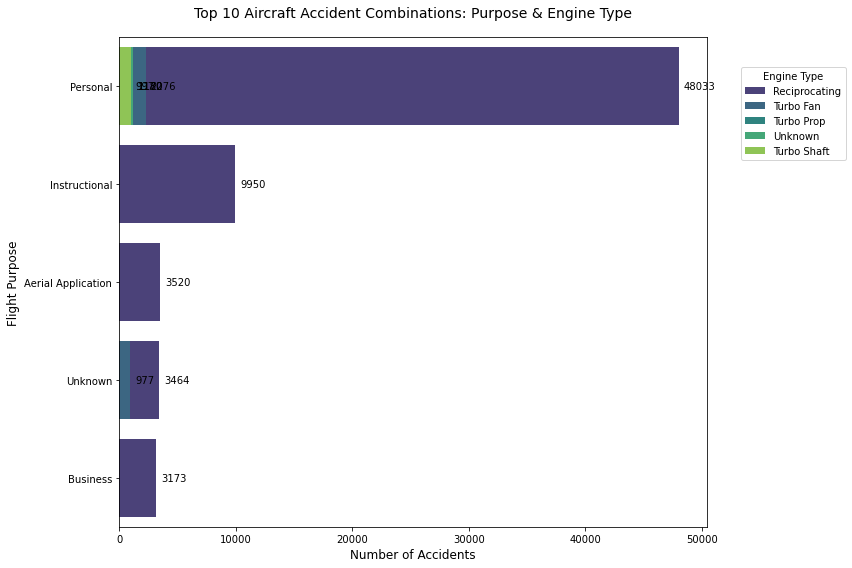

In [117]:
#We further would like to check the accidents occurence with the intended purpose and Engine type of the aircraft


# Group data and replace NaN with 0
purpose_engine = df.groupby(['Purpose_of_flight', 'Engine_Type'])['Event_Id'] \
                   .count() \
                   .reset_index(name='Accident_Count') \
                   .fillna(0)  # Replace NaN with 0
purpose_engine = purpose_engine.sort_values(by='Accident_Count', ascending=False).head(10)

# Create visualization
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=purpose_engine,
    y='Purpose_of_flight',
    x='Accident_Count',
    hue='Engine_Type',
    palette='viridis',
    dodge=False
)

# Add labels only if value is valid
for p in ax.patches:
    width = p.get_width()
    if not np.isnan(width) and width > 0:  # Skip NaN/zero
        ax.annotate(
            f"{int(width)}",
            (width, p.get_y() + p.get_height()/2),
            ha='left', va='center',
            xytext=(5, 0),
            textcoords='offset points',
            fontsize=10
        )

# Keep the rest of the styling code
plt.title("Top 10 Aircraft Accident Combinations: Purpose & Engine Type", pad=20, fontsize=14)
plt.xlabel("Number of Accidents", fontsize=12)
plt.ylabel("Flight Purpose", fontsize=12)
plt.legend(title='Engine Type', bbox_to_anchor=(1.05, 0.95), loc='upper left')
plt.tight_layout()
plt.show()

Reciprocating engine type is undoubtedly the biggest cause of accidents in the aircrafts.In the different purposes of the aircraft, aircrafts with reciprocating engines had the highest number of accidents.

48094 accidents in Personal aircrafts were directly linked to the Reciprocating engine, 9961 in instructional,3494 in aircrafts with Unknown Purpose and 3180 accidents in flights meant for business.

There need to be a lot of caution when purchasing aircrafts with Reciprocating  engines

### 6. Influence of Number of Engines on the Number of Accidents

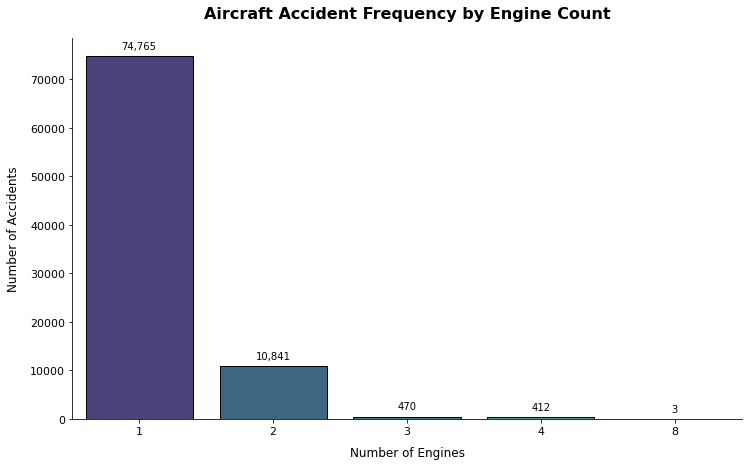


Accident Count by Engine Configuration:
| Number_of_Engines   | Accident_Count   |
|:--------------------|:-----------------|
| 1                   | 74765            |
| 2                   | 10841            |
| 3                   | 470              |
| 4                   | 412              |
| 8                   | 3                |


In [118]:
#Let us check the influence of number of engines and the number of accidents



# 1. Data Preparation
engine_accidents = (df.dropna(subset=['Number_of_Engines'])  # Remove missing values
                   .groupby('Number_of_Engines', as_index=False)
                   .agg(Accident_Count=('Event_Id', 'count'))
                   .sort_values('Number_of_Engines'))  # Sort by engine count for logical ordering

# 2. Create Visualization
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=engine_accidents, 
                 x='Number_of_Engines', 
                 y='Accident_Count',
                 palette='viridis',
                 edgecolor='black')

# 3. Add Value Labels
for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}", 
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom',
                fontsize=10,
                xytext=(0, 5),
                textcoords='offset points')

# 4. Style Enhancements
plt.title("Aircraft Accident Frequency by Engine Count", 
          pad=20, fontsize=16, fontweight='bold')
plt.xlabel("Number of Engines", fontsize=12, labelpad=10)
plt.ylabel("Number of Accidents", fontsize=12, labelpad=10)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
sns.despine()  # Clean up plot borders

# 5. Save and Show
plt.savefig("engine_accident_analysis.png", 
           dpi=600, 
           bbox_inches="tight",
           transparent=False)
plt.show()

# 6. Display Supporting Data
print("\nAccident Count by Engine Configuration:")
print(engine_accidents.to_markdown(index=False, numalign="left", stralign="left"))



Aircraft with 1 engine account for the highest accident rates

2- and 4-engine aircraft show significantly fewer accidents

Accident rates decrease disproportionately with added engines e.g 4 engines don’t reduce accidents by 4x vs. 1 engine, suggesting safety depends more on operational context than engine count alone.

### Final examination of the Total Injuries and their severity over years

In [119]:
#We will use mean to replace the missing values of numerical variables
# Step 1: Select numerical columns
num_var = df.select_dtypes(include=['int64', 'float64'])

# Step 2: Fill missing values with column means
df[num_var.columns] = df[num_var.columns].fillna(df[num_var.columns].mean())

# Verify no missing values in numerical columns
print(df[num_var.columns].isnull().sum())

Total_Fatal_Injuries      0
Total_Serious_Injuries    0
Total_Minor_Injuries      0
Total_Uninjured           0
Year                      0
dtype: int64


In [120]:
#We will use mean to replace the missing values of numerical variables
# Step 1: Select numerical columns
num_var = df.select_dtypes(include=['int64', 'float64'])

# Step 2: Fill missing values with column means
df[num_var.columns] = df[num_var.columns].fillna(df[num_var.columns].mean())

# Verify no missing values in numerical columns
print(df[num_var.columns].isnull().sum())

Total_Fatal_Injuries      0
Total_Serious_Injuries    0
Total_Minor_Injuries      0
Total_Uninjured           0
Year                      0
dtype: int64


In [121]:
#We will use mean to replace the missing values of numerical variables
# Step 1: Select numerical columns
num_var = df.select_dtypes(include=['int64', 'float64'])

# Step 2: Fill missing values with column means
df[num_var.columns] = df[num_var.columns].fillna(df[num_var.columns].mean())

# Verify no missing values in numerical columns
print(df[num_var.columns].isnull().sum())

Total_Fatal_Injuries      0
Total_Serious_Injuries    0
Total_Minor_Injuries      0
Total_Uninjured           0
Year                      0
dtype: int64


In [122]:
#We will use mean to replace the missing values of numerical variables
# Step 1: Select numerical columns
num_var = df.select_dtypes(include=['int64', 'float64'])

# Step 2: Fill missing values with column means
df[num_var.columns] = df[num_var.columns].fillna(df[num_var.columns].mean())

# Verify no missing values in numerical columns
print(df[num_var.columns].isnull().sum())

Total_Fatal_Injuries      0
Total_Serious_Injuries    0
Total_Minor_Injuries      0
Total_Uninjured           0
Year                      0
dtype: int64


In [123]:
#We will use mean to replace the missing values of numerical variables
# Step 1: Select numerical columns
num_var = df.select_dtypes(include=['int64', 'float64'])

# Step 2: Fill missing values with column means
df[num_var.columns] = df[num_var.columns].fillna(df[num_var.columns].mean())

# Verify no missing values in numerical columns
print(df[num_var.columns].isnull().sum())

Total_Fatal_Injuries      0
Total_Serious_Injuries    0
Total_Minor_Injuries      0
Total_Uninjured           0
Year                      0
dtype: int64


In [124]:
#Aggregate all injuries 
df['Total_injuries']=df['Total_Fatal_Injuries']+df['Total_Serious_Injuries']+df['Total_Minor_Injuries']

#Group total injuries per year
cnt_injuries=df.groupby(['Year'])['Total_injuries'].sum().reset_index().sort_values(by='Year', ascending=True)

#Group total of uninjured per year
no_injuries=df.groupby(['Year'])['Total_Uninjured'].count().reset_index().sort_values(by='Year', ascending=True)

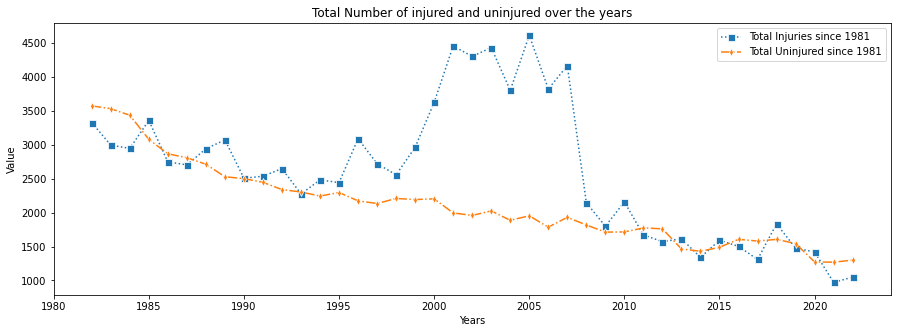

In [125]:
#Plot 2 graphs showing evolution of injuries and no injuries over time
plt.figure(figsize=(15,5))

sns.lineplot(data=cnt_injuries, x='Year', y='Total_injuries', label='Total Injuries since 1981', marker='s', markersize=7, linestyle='dotted')
sns.lineplot(data=no_injuries, x='Year', y='Total_Uninjured', label='Total Uninjured since 1981', marker='d', markersize=5, linestyle='dashdot')

plt.xlabel('Years')
plt.ylabel('Value')
plt.title('Total Number of injured and uninjured over the years')
plt.legend()

#Export the graph
plt.savefig("linegraph2.png", dpi=500, bbox_inches="tight")

#Render plot
plt.show()

In [127]:
df_cleaned = df.copy()

df_cleaned.to_csv('C:/Users/user/Documents/MORINGA/PhaseOne/cleaned_aviation_data.csv', index=False)